<font size="+5">#03. Decision Tree. A Supervised Classification Model</font>

<ul>
    <li>Doubts? → Ask me in <img src="https://emoji.gg/assets/emoji/3970-discord.png" style="height: 1em; vertical-align: middle;"> <a href="https://discord.gg/cmB3KGsqMy">Discord</a></li>
    <li>Tutorials → <img src="https://openmoji.org/php/download_asset.php?type=emoji&emoji_hexcode=E044&emoji_variant=color" style="height: 1em; vertical-align: middle;"> <a href="https://www.youtube.com/channel/UCovCte2I3loteQE_kRsfQcw">YouTube</a></li>
    <li>Book Private Lessons → <span style="color: orange">@</span> <a href="https://sotastica.com/reservar">sotastica</a></li>
</ul>

# Load the Data

Load the dataset from [CIS](https://www.cis.es/cis/opencms/ES/index.html) executing the lines of code below:
> - The goal of this dataset is
> - To predict `internet_usage` of **people** (rows)
> - Based on their **socio-demographical characteristics** (columns)

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/py-thocrates/data/main/internet_usage_spain.csv'

df = pd.read_csv(url)
df.head()

,internet_usage,sex,age,education
0,0,Female,66,Elementary
1,1,Male,72,Elementary
2,1,Male,48,University
3,0,Male,59,PhD
4,1,Female,44,PhD


# Data Preprocessing

> - Categorical variables contains `text`
> - If you pass the data to the model
> - It won't know how to interpret the text
> - Therefore, you need a way to convert text values
> - To numbers such as `0` or `1` **Dummy Variables**
> - Which `function()` do you use to achieve this?

In [2]:
df = pd.get_dummies(data=df, drop_first=True)
df.head()

,internet_usage,age,sex_Male,education_High School,education_Higher Level,education_No studies,education_PhD,education_University
0,0,66,0,0,0,0,0,0
1,1,72,1,0,0,0,0,0
2,1,48,1,0,0,0,0,1
3,0,59,1,0,0,0,1,0
4,1,44,0,0,0,0,1,0


# `DecisionTreeClassifier()` Model in Python

## Build the Model

> 1. **Necesity**: Build Model
> 2. **Google**: How do you search for the solution?
> 3. **Solution**: Find the `function()` that makes it happen

In [3]:
import pandas as pd

url = 'https://raw.githubusercontent.com/py-thocrates/data/main/internet_usage_spain.csv'

df = pd.read_csv(url)
df.head()

,internet_usage,sex,age,education
0,0,Female,66,Elementary
1,1,Male,72,Elementary
2,1,Male,48,University
3,0,Male,59,PhD
4,1,Female,44,PhD


In [4]:
df = pd.get_dummies(data=df, drop_first=True)
df.head()

,internet_usage,age,sex_Male,education_High School,education_Higher Level,education_No studies,education_PhD,education_University
0,0,66,0,0,0,0,0,0
1,1,72,1,0,0,0,0,0
2,1,48,1,0,0,0,0,1
3,0,59,1,0,0,0,1,0
4,1,44,0,0,0,0,1,0


In [7]:
feature_cols=['age','sex_Male','education_High School','education_Higher Level','education_No studies','education_PhD','education_University']
X = df[feature_cols]
y = df.internet_usage


## Code Thinking

> - By the time you get to the actual `function()` to compute the model
> - You'll notice they're asking you for two parameters:
> 1. `X`: **explanatory variables**
> 2. `y`: **target varaible**

### Finally `fit()` the Model

> - Pass the `objects` that **contains the sequence of numbers** of the two variables
> - To the `parameters` of the function that computes the Linear Regression Model

In [17]:
dfsel = df[['internet_usage']].copy()

In [18]:
dfsel['pred'] = y_pred

In [19]:
dfsel

,internet_usage,pred
0,0,0
1,1,0
2,1,1
3,0,0
4,1,1
...,...,...
2450,1,0
2451,1,1
2452,0,0
2453,1,1


## Make a Prediction

> You should already know that ML models are
> mathematical equations that you optimize to
> calculate predictions
>
> As you `fit()` the model, the mathematical function
> is built. Therefore, could you make a prediction?
>
> - Select a random person:

In [4]:
person = df.sample()

> - Compute the probability of this person for `internet_usage`:

## Visualize the Model

> 1. Use `plot_tree()`, contained in `tree` module from `sklearn` library
> 2. Then, you may use `[shift] + [tab]` to see what **parameters** the function is asking for

In [20]:
from sklearn.tree import plot_tree

In [21]:
clf

DecisionTreeClassifier()

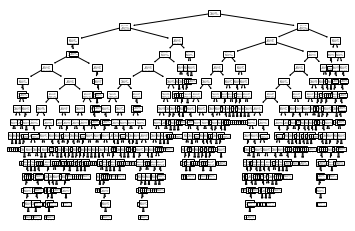

In [22]:
plot_tree(decision_tree=clf);

> - Could you justify how we got to the prediction in previous exercise?

# Decision Tree Algorithm Explanation

> _You may watch the following video to understand how the Decision Tree works:_

In [6]:
%%HTML

<iframe width="560" height="315" src="https://www.youtube.com/embed/7VeUPuFGJHk" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

# Model Interpretation

> - Which is the variable in the **root node**?
> - Is it the most **important feature**? Why?

# Real vs. Predicted Data

> - Compute all predictions:
>
> - `model.predict()`

> How good is our model?
>
> 1. Create a new `DataFrame` column to assign the predictions.
>
> - `df['pred'] = predictions`

> - `df.sample(10)` to check if predictions are equal to reality:

> 2. How to measure the **model's error**?
> - How good is our model to predict reality?
> - `model.score()`

# Confusion Matrix

> 1. Use function `confusion_matrix()`, or `plot_confusion_matrix()`
> 2. What represents the first number in the matrix?

# Other Metrics

## Sensitivity

## Specificity

## Classification Report

> 1. Use `classification_report()`
> 2. Save the resulting object in `report`
> 3. `print(report)`
> 4. Are some numbers equal to the ones we calculated before (Sensitivity & Specificity?

## ROC Curve

> - Use `plot_roc_curve()`
>
> _You may watch the following video to understand the metric:_

In [7]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/4jRBRDbJemM" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

# Achieved Goals

_Haz doble click sobre esta celda y pon una `X` dentro de las casillas [X] si crees que has superado los objetivos:_

- [ ] Entender cómo se usan los **Algoritmos de Árboles**.
- [ ] Entender otra forma de **comparar los datos reales con las predicciones** del modelo.
- [ ] No todas las visualizaciones de modelos son iguales. En este caso también podemos **visualizar un árbol** para interpretar el modelo.
- [ ] Distinguir el papel de la **probabilidad** a la hora de optimizar este tipo de modelos.
- [ ] Saber determinar **por qué una variable es importante** en el modelo. Es decir, por qué aporta diferencias significativas.
- [ ] Entender la necesidad de **normalizar** los datos.